In [69]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from datetime import *
pd.set_option('display.max_columns', None)
gbr = pd.read_csv('gbr_predictions_v3.csv')
bagr = pd.read_csv('bagr_predictions_v3.csv')
vegas_lines = pd.read_csv('game_lines.csv')
past_2019 = pd.read_csv('past_2019_v2.csv')
future_2019 = pd.read_csv('future_2019_v2.csv')
all_games = pd.read_csv('allgames_future_v6.csv')

In [5]:
vegas_lines=vegas_lines.drop(columns='Unnamed: 0')

In [6]:
vegas_lines=vegas_lines.set_index('GameNum')

In [7]:
gbr = gbr.merge(right=gbr, left_on='GameNum', right_on='GameNum')
bagr = bagr.merge(right=bagr, left_on='GameNum', right_on='GameNum')

In [8]:
### only run if predicting future
### change GameNum to next Thursday game

# bagr_next_week = bagr[bagr['GameNum'] >= 3648]
# bagr = bagr[bagr['GameNum'] < 3648]

#gbr_next_week = gbr[gbr['GameNum'] >= 3648]
#gbr = gbr[gbr['GameNum'] < 3648]

In [9]:
gbr_opposing_1 = gbr.merge(right=all_games[['GameNum','Opposing Team','H/A','PA','PF']], 
                           left_on=['GameNum','Team_y'], 
                           right_on=['GameNum','Opposing Team'])

bagr_opposing_1 = bagr.merge(right=all_games[['GameNum','Opposing Team','H/A','PA','PF']], 
                             left_on=['GameNum','Team_y'],
                             right_on=['GameNum','Opposing Team'])


Broken Code, gets rid of many games

In [10]:
# mask= gbr_opposing_1['Team_x'] != gbr_opposing_1['Team_y']
# gbr_opposing_1=gbr_opposing_1[gbr_opposing_1['H/A']=='H'].drop_duplicates(subset=['Team_y','Team_x'])
# gbr_opposing_1=gbr_opposing_1[mask]

In [11]:
# mask1= bagr_opposing_1['Team_x'] != bagr_opposing_1['Team_y']
# bagr_opposing_1=bagr_opposing_1[bagr_opposing_1['H/A']=='H'].drop_duplicates(subset=['Team_y','Team_x'])
# bagr_opposing_1=bagr_opposing_1[mask1]

In [12]:
gbr_opposing_1

,Unnamed: 0_x,PASS_x,Team_x,GameNum,PBLK_x,RECV_x,RUN_x,RBLK_x,RDEF_x,TACK_x,PRSH_x,COV_x,Unnamed: 0_y,PASS_y,Team_y,PBLK_y,RECV_y,RUN_y,RBLK_y,RDEF_y,TACK_y,PRSH_y,COV_y,Opposing Team,H/A,PA,PF
0,0,63.386763,Arizona Cardinals,185,63.856006,66.631046,57.815000,77.530524,65.757753,60.722700,60.856237,68.964561,0,63.386763,Arizona Cardinals,63.856006,66.631046,57.815000,77.530524,65.757753,60.722700,60.856237,68.964561,Arizona Cardinals,H,23,35
1,448,63.610425,Detroit Lions,185,73.315705,66.507129,62.465587,66.612546,63.488855,61.632662,65.239635,60.087604,0,63.386763,Arizona Cardinals,63.856006,66.631046,57.815000,77.530524,65.757753,60.722700,60.856237,68.964561,Arizona Cardinals,H,23,35
2,0,63.386763,Arizona Cardinals,185,63.856006,66.631046,57.815000,77.530524,65.757753,60.722700,60.856237,68.964561,448,63.610425,Detroit Lions,73.315705,66.507129,62.465587,66.612546,63.488855,61.632662,65.239635,60.087604,Detroit Lions,A,35,23
3,448,63.610425,Detroit Lions,185,73.315705,66.507129,62.465587,66.612546,63.488855,61.632662,65.239635,60.087604,448,63.610425,Detroit Lions,73.315705,66.507129,62.465587,66.612546,63.488855,61.632662,65.239635,60.087604,Detroit Lions,A,35,23
4,1,59.515669,Arizona Cardinals,186,65.569621,66.631046,58.962000,70.364349,63.726920,66.819868,61.776195,66.535798,1,59.515669,Arizona Cardinals,65.569621,66.631046,58.962000,70.364349,63.726920,66.819868,61.776195,66.535798,Arizona Cardinals,H,16,13
5,582,72.406520,Indianapolis Colts,186,69.177812,68.189790,59.003647,69.401987,59.795418,66.375994,63.441968,65.842928,1,59.515669,Arizona Cardinals,65.569621,66.631046,58.962000,70.364349,63.726920,66.819868,61.776195,66.535798,Arizona Cardinals,H,16,13
6,1,59.515669,Arizona Cardinals,186,65.569621,66.631046,58.962000,70.364349,63.726920,66.819868,61.776195,66.535798,582,72.406520,Indianapolis Colts,69.177812,68.189790,59.003647,69.401987,59.795418,66.375994,63.441968,65.842928,Indianapolis Colts,A,13,16
7,582,72.406520,Indianapolis Colts,186,69.177812,68.189790,59.003647,69.401987,59.795418,66.375994,63.441968,65.842928,582,72.406520,Indianapolis Colts,69.177812,68.189790,59.003647,69.401987,59.795418,66.375994,63.441968,65.842928,Indianapolis Colts,A,13,16
8,2,56.255643,Arizona Cardinals,187,63.726007,73.747046,57.823000,66.536443,63.206503,60.722700,65.210915,62.498278,2,56.255643,Arizona Cardinals,63.726007,73.747046,57.823000,66.536443,63.206503,60.722700,65.210915,62.498278,Arizona Cardinals,A,17,28
9,360,68.032350,Dallas Cowboys,187,69.668623,70.532051,61.086630,76.164800,59.905605,66.883244,65.156419,62.812153,2,56.255643,Arizona Cardinals,63.726007,73.747046,57.823000,66.536443,63.206503,60.722700,65.210915,62.498278,Arizona Cardinals,A,17,28


In [13]:
bagr_opposing_1 = bagr_opposing_1[bagr_opposing_1['Team_x'] != bagr_opposing_1['Team_y']]
bagr_opposing_1 = bagr_opposing_1[bagr_opposing_1['H/A'] == 'H']

gbr_opposing_1 = gbr_opposing_1[gbr_opposing_1['Team_x'] != gbr_opposing_1['Team_y']]
gbr_opposing_1 = gbr_opposing_1[gbr_opposing_1['H/A'] == 'H']

In [14]:
gbr_opposing_1=gbr_opposing_1.drop(columns=['H/A','Opposing Team','Team_y','Unnamed: 0_y','Team_x','Unnamed: 0_x'])
bagr_opposing_1=bagr_opposing_1.drop(columns=['H/A','Opposing Team','Team_y','Unnamed: 0_y','Team_x','Unnamed: 0_x'])

In [15]:
gbr_opposing_1 = gbr_opposing_1.set_index('GameNum').reset_index()
bagr_opposing_1 = bagr_opposing_1.set_index('GameNum').reset_index()

In [16]:
bagr_opposing_1 = bagr_opposing_1.sort_values('GameNum')
gbr_opposing_1 = gbr_opposing_1.sort_values('GameNum')

In [17]:
# attributes_x = gbr_opposing_1.columns[1:-11]
# print(attributes_x)

# attributes_y = gbr_opposing_1.columns[10:-2]
# attributes_y

In [18]:
def average(df1, df2):
    team_x = (df1[attributes_x] + df2[attributes_x]) / 2
    team_y = (df1[attributes_y] + df2[attributes_y]) / 2
    pf = df1['PF']
    pa = df1['PA']
    game_num = df1['GameNum']
    
    return team_x.join(team_y).join(pf).join(pa).join(game_num)

In [19]:
# ensemble = average(gbr_opposing_1, bagr_opposing_1).set_index('GameNum')

# Select data to use here

In [20]:
# PFY=bagr_opposing_1['PF']
# PAY=bagr_opposing_1['PA']
# df=bagr_opposing_1
# X=df.drop(['PA','PF'],axis=1)

In [21]:
## Only run if trying to predict next week

## Put the next upcoming game's GameNum as next_game

df=gbr_opposing_1

next_game = 3648

PFY = df[df['GameNum'] < next_game]['PF']
PAY = df[df['GameNum'] < next_game]['PA']

df = df.drop(['PA','PF'],axis=1)

df_next_week = df[df['GameNum'] >= next_game]
df_next_week_pred = df[df['GameNum'] >= next_game][['GameNum','PASS_x']]
X = df[df['GameNum'] < next_game]

In [22]:
loss = ['ls','huber']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 10, num = 10)]
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 10, num = 10)]
learning_rate = np.linspace(start=0.01, stop=0.6, num=12)

In [23]:
param_grid = {'loss': loss,
              'learning_rate': learning_rate,
              'max_depth': max_depth,
              'n_estimators': n_estimators}
print(param_grid)

{'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'loss': ['ls', 'huber'], 'learning_rate': array([0.01      , 0.06363636, 0.11727273, 0.17090909, 0.22454545,
       0.27818182, 0.33181818, 0.38545455, 0.43909091, 0.49272727,
       0.54636364, 0.6       ]), 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}


In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,PFY,test_size=.33, random_state=1220)

# X_train = X[:-150]
# X_test = X[-150:]
# y_train = PFY[:-150]
# y_test = PFY[-150:]

#X_train,X_test,y_train,y_test = train_test_split(X,PFY,test_size=13,random_state=3)

In [25]:
%%time
gbr = GradientBoostingRegressor()
grid_search = GridSearchCV(gbr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 646 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 1722 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 3101 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 4963 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 6383 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 9161 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 11475 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 12000 out of 12000 | elapsed:  4.1min finished


Wall time: 4min 3s


In [26]:
grid_search.best_params_

{'learning_rate': 0.11727272727272726,
 'loss': 'huber',
 'max_depth': 5,
 'n_estimators': 8}

In [27]:
regressor = GradientBoostingRegressor(
    max_depth=grid_search.best_params_['max_depth'],
    n_estimators=grid_search.best_params_['n_estimators'],
    learning_rate=grid_search.best_params_['learning_rate']
)
regressor.fit(X_train, y_train)
errors = [mean_squared_error(y_test, y_pred) for y_pred in regressor.staged_predict(X_test)]
best_n_estimators = np.argmin(errors)
best_regressor = GradientBoostingRegressor(
    max_depth=grid_search.best_params_['max_depth'],
    n_estimators=grid_search.best_params_['n_estimators'],
    learning_rate=grid_search.best_params_['learning_rate']
)
best_regressor.fit(X_train, y_train)

# X_test = X_test.append(df_next_week)

df_next_week_pred['Predicted PF'] = best_regressor.predict(df_next_week)
y_pred = best_regressor.predict(X_test)
mean_absolute_error(y_test, y_pred)

8.057598761844309

In [28]:
fill0 = pd.Series([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
df_next_week_pred['PFY'] = fill0

PFY_df = pd.DataFrame(y_test, columns = ['PFY']) 
PFY_df['PFY']=y_test
PFY_df['Predicted PF']=y_pred
PFY_df.iloc[:5]

,PFY,Predicted PF
559,30,21.061783
619,34,22.486747
80,10,23.067756
689,34,20.429378
514,18,21.116053


In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,PAY,test_size=.33, random_state=1220)

# X_train = X[:-150]
# X_test = X[-150:]
# y_train = PAY[:-150]
# y_test = PAY[-150:]

In [30]:
%%time
gbr = GradientBoostingRegressor()
grid_search = GridSearchCV(gbr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 680 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 1916 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done 3001 tasks      | elapsed:   54.8s
[Parallel(n_jobs=-1)]: Done 4934 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 6144 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 9177 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 11807 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 11993 out of 12000 | elapsed:  3.9min remaining:    0.0s


Wall time: 3min 56s


[Parallel(n_jobs=-1)]: Done 12000 out of 12000 | elapsed:  3.9min finished


In [31]:
grid_search.best_params_

{'learning_rate': 0.4390909090909091,
 'loss': 'huber',
 'max_depth': 1,
 'n_estimators': 4}

In [32]:
regressor = GradientBoostingRegressor(
    max_depth=grid_search.best_params_['max_depth'],
    n_estimators=grid_search.best_params_['n_estimators'],
    learning_rate=grid_search.best_params_['learning_rate']
)

regressor.fit(X_train, y_train)
errors = [mean_squared_error(y_test, y_pred) for y_pred in regressor.staged_predict(X_test)]
best_n_estimators = np.argmin(errors)
best_regressor = GradientBoostingRegressor(
    max_depth=grid_search.best_params_['max_depth'],
    n_estimators=grid_search.best_params_['n_estimators'],
    learning_rate=grid_search.best_params_['learning_rate']
)
best_regressor.fit(X_train, y_train)

# X_test = X_test.append(df_next_week)
df_next_week_pred['Predicted PA'] =  best_regressor.predict(df_next_week)

y_pred = best_regressor.predict(X_test)
mean_absolute_error(y_test, y_pred)

7.8973045836164815

In [33]:
fill0 = pd.Series([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
df_next_week_pred['PAY'] = fill0

PAY_df = pd.DataFrame(y_test, columns = ['PAY']) 
PAY_df['PAY']=y_test
PAY_df['Predicted PA']=y_pred
PAY_df.iloc[:5]

,PAY,Predicted PA
559,10,20.870880
619,17,23.869392
80,24,20.870880
689,3,20.870880
514,24,22.185971


# Predictions

In [103]:
df_next_week_pred=df_next_week_pred.fillna(0)

In [104]:
PFY_join = PFY_df.reset_index()
PAY_join = PAY_df.reset_index()
X_test_join = X_test.reset_index()


In [105]:
# predicted_df = X_test_join[['GameNum','index']].merge(PAY_join, left_on='index', right_on='index')#.merge(PFY_join, left_on='index', right_on='index')
predicted_df = X_test_join[['GameNum','index']].merge(PAY_join, how='outer')
#predicted_df['Predicted PA'][-32:-16] = predicted_df['Predicted PA'][-16:]
#predicted_df['PAY'] = predicted_df['PAY'].fillna(0)

predicted_df = predicted_df.merge(PFY_join, how='outer').drop(columns='index')
#predicted_df['Predicted PF'][-32:-16] = predicted_df['Predicted PF'][-16:]
#predicted_df['PFY'] = predicted_df['PFY'].fillna(0)
#predicted_df=predicted_df.append(df_next_week_pred.drop(columns='PASS_x'))
predicted_df = predicted_df.dropna()
predicted_df[predicted_df['GameNum' ]==3633]

,GameNum,PAY,Predicted PA,PFY,Predicted PF
143,3633,34,20.87088,17,19.945297


In [106]:
predicted_df['PAY']= predicted_df['PAY'].astype(float)
predicted_df['PFY']= predicted_df['PFY'].astype(float)

In [107]:
predicted_df['Predicted_Spread']=np.round((predicted_df['Predicted PF']-predicted_df['Predicted PA'])*-1) #round

predicted_df['Game_Spread']=(predicted_df['PFY'].astype(float)-predicted_df['PAY'].astype(float))*-1

predicted_df['Predicted_OU']=np.round(predicted_df['Predicted PA']+predicted_df['Predicted PF']) #round

predicted_df['Game_OU']=(predicted_df['PFY']+predicted_df['PAY'])

sum(abs(predicted_df['Predicted_Spread']-predicted_df['Game_Spread']))/len(predicted_df['Game_Spread'])

10.991489361702127

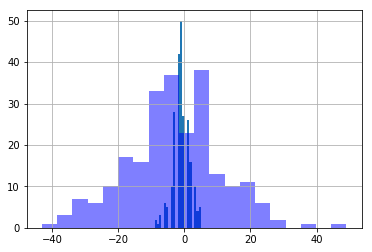

In [108]:
predicted_df['Predicted_Spread'].hist(bins=20)
predicted_df['Game_Spread'].hist(bins=20,alpha=0.5,color='b')

# Compare to Lines

In [109]:
# lines_2019 = past_2019.append(future_2019)
# def getdate(s):
#     if (len(s)!=5):
#         return s[5:-9]

# def getdate2(s):
#     return s[5:]

# # all_games['Date'] = all_games['Date'].apply(getdate)
# keys = all_games[(all_games['H/A']=='A') & (all_games['Season']==2019)][['GameNum','Opposing Team','Week','Date']]
# lines_2019['Date'] = lines_2019['Date'].apply(getdate2)
# lines_2019.merge(keys,left_on=['Date','Home'],right_on=['Date','Opposing Team'])

In [110]:
lines_2019 = past_2019.append(future_2019)
current_week = all_games[all_games['Season']==2019]['Week'].astype(int).max()

def getWeek(s):
    new_date = date(int(s[:4]), int(s[5:7]), int(s[8:10]))
    for i in range(1,current_week+1):
        if (new_date < date(2019,9,3) + timedelta(7*i)):
            return i


keys = all_games[(all_games['H/A']=='H') & (all_games['Season']==2019)][['GameNum','Opposing Team','Week','Team']]
# lines_2019['Week'] = lines_2019['Date'].apply(getWeek)

lines_2019['Week'] = lines_2019['Date'].apply(getWeek).astype(str)
lines_2019 = lines_2019.merge(keys,left_on=['Week','Home', 'Away'],right_on=['Week','Opposing Team', 'Team'])
lines_2019 = lines_2019.drop(columns=['Unnamed: 0', 'Date'])
lines_2019[lines_2019['GameNum']==3633]

,Away,Away_Spread,Away_Payout,Home,Home_Spread,Home_Payout,Week,GameNum,Opposing Team,Team
130,New York Jets,1.5,-105,Washington Redskins,-1.5,-105,11,3633,Washington Redskins,New York Jets


In [84]:
#lines_2019.merge(predicted_df, left_on='GameNum', right_on='GameNum')

In [111]:
predicted_df['Difference']=abs(predicted_df['Game_Spread']-predicted_df['Predicted_Spread'])
# predicted_df.sort_values(by=['Difference'],ascending=False)
# predicted_df=pd.merge(predicted_df, vegas_lines, left_on='GameNum', right_on='GameNum')
predicted_df = pd.merge(predicted_df, lines_2019, left_on='GameNum', right_on='GameNum')

In [86]:
# predicted_df.dropna()
# predicted_df['Vegas_Line']=predicted_df['home.line']
# predicted_df['Vegas_OU']=predicted_df['over.under']
# predicted_df=predicted_df.drop(columns=['Difference','home.line','Predicted PA','Predicted PF'])
# predicted_df.iloc[:5]

In [112]:
# predicted_lines['Vegas_Line']=predicted_lines['home.line']
# predicted_lines['Vegas_OU']=predicted_lines['over.under']
# predicted_lines=predicted_lines.drop(columns=['Difference','home.line','Predicted PA','Predicted PF'])

predicted_df['Vegas_Line']=predicted_df['Home_Spread']
#predicted_lines['Vegas_OU']=predicted_lines['over.under']
#predicted_lines=predicted_lines.drop(columns=['Difference','home.line','Predicted PA','Predicted PF'])


In [113]:
# #use this to look which way to bet
# finished_bets = predicted_df.drop(columns=['Predicted_OU','Game_OU',
#                                            'Difference','Home_Spread','Away_Spread',
#                                            'Unnamed: 0','Opposing Team'])

# finished_bets[finished_bets['GameNum']>=3648].sort_values('Date').to_csv('first_bets_2019holdout_bagr2.csv')

predicted_df = predicted_df[predicted_df['GameNum'] < 3648]

In [114]:
#Betting Rules, Win

# Home Favorite More -- Bet on home #77%
predicted_df.loc[(predicted_df.Predicted_Spread < 0) & \
                 (predicted_df.Vegas_Line < 0) & \
                 (predicted_df.Predicted_Spread < predicted_df.Vegas_Line ) & \
                 (predicted_df.Game_Spread < predicted_df.Vegas_Line) , 'Win'] = int(1)

#Home Favorite Less -- Bet on away #50%
predicted_df.loc[(predicted_df.Predicted_Spread < 0) & \
                 (predicted_df.Vegas_Line < 0) & \
                 (predicted_df.Predicted_Spread > predicted_df.Vegas_Line)& \
                 (predicted_df.Game_Spread > predicted_df.Vegas_Line) , 'Win'] = int(1)

# Home Favorite Dog -- Bet on home #63.64%
predicted_df.loc[(predicted_df.Predicted_Spread < 0) & \
                 (predicted_df.Vegas_Line > 0) & \
                 (predicted_df.Game_Spread <predicted_df.Vegas_Line) , 'Win'] = int(1)

# Home Dog More -- Bet on away #no bets
predicted_df.loc[(predicted_df.Predicted_Spread > 0) & \
                 (predicted_df.Vegas_Line > 0) & \
                 (predicted_df.Predicted_Spread > predicted_df.Vegas_Line ) & \
                 (predicted_df.Game_Spread > predicted_df.Vegas_Line) , 'Win'] = int(1)

# Home Dog Less -- Bet on home #100%, 2 games
predicted_df.loc[(predicted_df.Predicted_Spread > 0) & \
                 (predicted_df.Vegas_Line > 0) & \
                 (predicted_df.Predicted_Spread < predicted_df.Vegas_Line)& \
                 (predicted_df.Game_Spread <predicted_df.Vegas_Line) , 'Win'] = int(1)

# # Home Dog Favorite -- Bet on away #100%, 9 games
predicted_df.loc[(predicted_df.Predicted_Spread > 0) & \
                 (predicted_df.Vegas_Line < 0) & \
                 (predicted_df.Game_Spread > predicted_df.Vegas_Line) , 'Win'] = int(1)

In [115]:
#Betting Rules, Loss
predicted_df.loc[(predicted_df.Predicted_Spread < 0) & \
                 (predicted_df.Vegas_Line < 0) & \
                 (predicted_df.Predicted_Spread < predicted_df.Vegas_Line) & \
                 (predicted_df.Game_Spread >predicted_df.Vegas_Line) , 'Win'] = int(0)

predicted_df.loc[(predicted_df.Predicted_Spread < 0) & \
                 (predicted_df.Vegas_Line < 0) & 
                 (predicted_df.Predicted_Spread > predicted_df.Vegas_Line) &
                 (predicted_df.Game_Spread <predicted_df.Vegas_Line) , 'Win'] = int(0)

predicted_df.loc[(predicted_df.Predicted_Spread < 0) & \
                 (predicted_df.Vegas_Line > 0) & \
                 (predicted_df.Game_Spread >predicted_df.Vegas_Line) , 'Win'] = int(0)

predicted_df.loc[(predicted_df.Predicted_Spread > 0) & \
                 (predicted_df.Vegas_Line > 0) & 
                 (predicted_df.Predicted_Spread > predicted_df.Vegas_Line) & \
                 (predicted_df.Game_Spread <predicted_df.Vegas_Line) , 'Win'] = int(0)

predicted_df.loc[(predicted_df.Predicted_Spread > 0) & \
                 (predicted_df.Vegas_Line > 0) & 
                 (predicted_df.Predicted_Spread < predicted_df.Vegas_Line) & 
                 (predicted_df.Game_Spread >predicted_df.Vegas_Line) , 'Win'] = int(0)

predicted_df.loc[(predicted_df.Predicted_Spread > 0) & \
                 (predicted_df.Vegas_Line < 0) & \
                 (predicted_df.Game_Spread <predicted_df.Vegas_Line) , 'Win'] = int(0)

In [91]:
# #O/U Bet the Under Win
# predicted_df.loc[(predicted_df.Predicted_OU < predicted_df.Vegas_OU)& \
#                 (predicted_df.Game_OU < predicted_df.Vegas_OU), 'O/U Win'] = int(1)
# #O/U Bet the Over Win
# predicted_df.loc[(predicted_df.Predicted_OU > predicted_df.Vegas_OU)& \
#                 (predicted_df.Game_OU > predicted_df.Vegas_OU), 'O/U Win'] = int(1)
# #O/U Bet the Under Loss
# predicted_df.loc[(predicted_df.Predicted_OU < predicted_df.Vegas_OU)& \
#                 (predicted_df.Game_OU > predicted_df.Vegas_OU), 'O/U Win'] = int(0)
# #O/U Bet the Over Loss
# predicted_df.loc[(predicted_df.Predicted_OU > predicted_df.Vegas_OU)& \
#                 (predicted_df.Game_OU < predicted_df.Vegas_OU), 'O/U Win'] = int(0)

In [116]:
#ML Bet Home Team Win
predicted_df.loc[(predicted_df.Predicted_Spread < 0)& \
                (predicted_df.Game_Spread < 0), 'ML Win'] = int(1)
#ML Bet Away Team Win
predicted_df.loc[(predicted_df.Predicted_Spread > 0)& \
                (predicted_df.Game_Spread > 0), 'ML Win'] = int(1)
#ML Bet Home Team Loss
predicted_df.loc[(predicted_df.Predicted_Spread < 0)& \
                (predicted_df.Game_Spread > 0), 'ML Win'] = int(0)
#ML Bet Away Team Loss
predicted_df.loc[(predicted_df.Predicted_Spread > 0)& \
                (predicted_df.Game_Spread < 0), 'ML Win'] = int(0)

In [120]:
print((predicted_df['Win'].sum()/len(predicted_df))*100)

59.09090909090909


In [118]:
predicted_df['Win'].sum()

26.0

In [119]:
predicted_df=predicted_df.dropna()
spread_win_rate=round((predicted_df['Win'].sum()/len(predicted_df))*100,2)
# ou_win_rate=round((predicted_df['O/U Win'].sum()/len(predicted_df))*100,2)
ml_win_rate=round((predicted_df['ML Win'].sum()/len(predicted_df))*100,2)
print('Spread Win Rate:' + str(' ') + str(spread_win_rate)+str('%'))
# print('O/U Win Rate:' + str(' ') + str(ou_win_rate)+str('%'))
print('ML Win Rate:' + str(' ') + str(ml_win_rate)+str('%'))

Spread Win Rate: 59.09%
ML Win Rate: 56.82%


In [96]:
spread_loss_rate=round((1-predicted_df['Win'].sum()/len(predicted_df))*100,2)
#ou_loss_rate=round((1-predicted_df['O/U Win'].sum()/len(predicted_df))*100,2)
ml_loss_rate=round((1-predicted_df['ML Win'].sum()/len(predicted_df))*100,2)
print('Spread Loss Rate:' + str(' ') + str(spread_loss_rate)+str('%'))
#print('O/U Loss Rate:' + str(' ') + str(ou_loss_rate)+str('%'))
print('ML Loss Rate:' + str(' ') + str(ml_loss_rate)+str('%'))

Spread Loss Rate: 40.91%
ML Loss Rate: 43.18%


In [150]:
predicted_df

,GameNum,PAY,Predicted PA,PFY,Predicted PF,Predicted_Spread,Game_Spread,Predicted_OU,Game_OU,Difference,Away,Away_Spread,Away_Payout,Home,Home_Spread,Home_Payout,Week,Opposing Team,Team,Vegas_Line,Win,ML Win
0,437,24.0,20.870880,10.0,23.067756,-2.0,14.0,44.0,34.0,16.0,Tennessee Titans,3.0,108,Atlanta Falcons,-3.0,-118,4,Atlanta Falcons,Tennessee Titans,-3.0,1.0,0.0
3,2505,19.0,22.185971,13.0,23.602412,-1.0,6.0,46.0,32.0,7.0,Indianapolis Colts,10.5,-105,Kansas City Chiefs,-10.5,-105,5,Kansas City Chiefs,Indianapolis Colts,-10.5,1.0,0.0
4,1240,16.0,22.185971,14.0,19.956309,2.0,2.0,42.0,30.0,0.0,Chicago Bears,-2.5,-120,Denver Broncos,2.5,110,2,Denver Broncos,Chicago Bears,2.5,1.0,1.0
5,3622,7.0,20.870880,41.0,24.637368,-4.0,-34.0,46.0,48.0,30.0,Houston Texans,4.5,-107,Baltimore Ravens,-4.5,-103,11,Baltimore Ravens,Houston Texans,-4.5,0.0,1.0
6,1742,10.0,22.185971,12.0,21.453715,1.0,-2.0,44.0,22.0,3.0,Dallas Cowboys,-2.5,-110,New Orleans Saints,2.5,100,4,New Orleans Saints,Dallas Cowboys,2.5,1.0,0.0
8,3641,9.0,23.869392,13.0,25.498915,-2.0,-4.0,49.0,22.0,2.0,Dallas Cowboys,5.5,-105,New England Patriots,-5.5,-105,12,New England Patriots,Dallas Cowboys,-5.5,1.0,1.0
9,3118,14.0,20.870880,34.0,23.590316,-3.0,-20.0,44.0,48.0,17.0,Oakland Raiders,9.0,-109,Minnesota Vikings,-9.0,-101,3,Minnesota Vikings,Oakland Raiders,-9.0,0.0,1.0
10,3120,20.0,23.869392,38.0,25.791192,-2.0,-18.0,50.0,58.0,16.0,Philadelphia Eagles,3.5,-109,Minnesota Vikings,-3.5,-101,6,Minnesota Vikings,Philadelphia Eagles,-3.5,0.0,1.0
12,3266,24.0,23.869392,31.0,25.941172,-2.0,-7.0,50.0,55.0,5.0,Tampa Bay Buccaneers,3.0,-110,New Orleans Saints,-3.0,100,5,New Orleans Saints,Tampa Bay Buccaneers,-3.0,0.0,1.0
13,3612,13.0,22.554301,20.0,24.044445,-1.0,-7.0,47.0,33.0,6.0,Detroit Lions,6.5,-105,Chicago Bears,-6.5,-105,10,Chicago Bears,Detroit Lions,-6.5,0.0,1.0


In [98]:
predicted_df['Win'].sum() / predicted_df['Win'].count()

0.5909090909090909

# Next Week Predictions

In [99]:
next_week_pred = df_next_week_pred.merge(lines_2019, 
                        left_on='GameNum', 
                        right_on='GameNum').drop(columns= ['PASS_x','PFY','Week', 'Team',
                                                           'PAY', 'Opposing Team',])
next_week_pred['Predicted_Spread']=np.round((next_week_pred['Predicted PF']-next_week_pred['Predicted PA'])*-1) #round
next_week_pred['Vegas_Line'] = next_week_pred['Home_Spread']

In [100]:
#Betting Rules, Win

# Home Favorite More -- Bet on home #77%
next_week_pred.loc[(next_week_pred.Predicted_Spread < 0) & \
                 (next_week_pred.Vegas_Line < 0) & \
                 (next_week_pred.Predicted_Spread < next_week_pred.Vegas_Line ) , 'Bet'] =  "Home Favorite More -- Bet on home"

#Home Favorite Less -- Bet on away #50%
next_week_pred.loc[(next_week_pred.Predicted_Spread < 0) & \
                 (next_week_pred.Vegas_Line < 0) & \
                 (next_week_pred.Predicted_Spread > next_week_pred.Vegas_Line), 'Bet'] = "Home Favorite Less -- Bet on away"

# Home Favorite Dog -- Bet on home #63.64%
next_week_pred.loc[(next_week_pred.Predicted_Spread < 0) & \
                 (next_week_pred.Vegas_Line > 0)  , 'Bet'] = "Home Favorite Dog -- Bet on home"

# Home Dog More -- Bet on away #no bets
next_week_pred.loc[(next_week_pred.Predicted_Spread > 0) & \
                 (next_week_pred.Vegas_Line > 0) & \
                 (next_week_pred.Predicted_Spread > next_week_pred.Vegas_Line ) , 'Bet'] = "Home Dog More -- Bet on away"

# Home Dog Less -- Bet on home #100%, 2 games
next_week_pred.loc[(next_week_pred.Predicted_Spread > 0) & \
                 (next_week_pred.Vegas_Line > 0) & \
                 (next_week_pred.Predicted_Spread < next_week_pred.Vegas_Line) , 'Bet'] = "Home Dog Less -- Bet on home"

# Home Dog Favorite -- Bet on away #100%, 9 games
next_week_pred.loc[(next_week_pred.Predicted_Spread > 0) & \
                 (next_week_pred.Vegas_Line < 0) , 'Bet'] = "Home Dog Favorite -- Bet on away"

next_week_pred.loc[(next_week_pred.Predicted_Spread == 0), 'Bet'] = 'Zero Spread'


In [121]:
next_week_pred.append(next_week_pred)[next_week_pred["GameNum"] == 3648]
print((predicted_df['Win'].sum()/len(predicted_df))*100)

59.09090909090909


C:\Users\chris\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


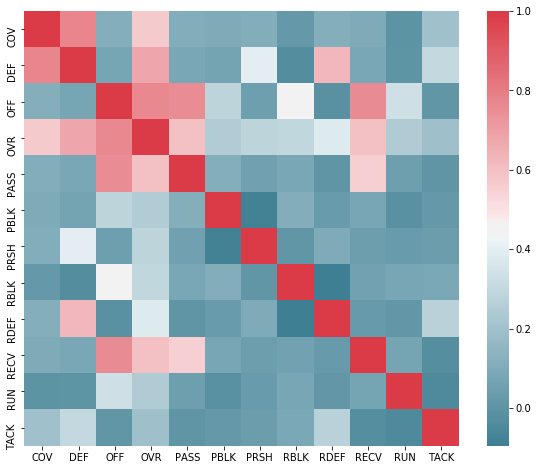

In [149]:
corr_df = all_games.drop(columns=['Unnamed: 0','Date','GameNum','Opposing Team','PA','H/A','PF','SPEC','Season','Team','Time','W/L','Week'])
corr_df = corr_df.dropna()

corr_df['COV'] = pd.to_numeric(corr_df['COV'])
corr_df['DEF'] = pd.to_numeric(corr_df['DEF'])
corr_df['OFF'] = pd.to_numeric(corr_df['OFF'])
corr_df['OVR'] = pd.to_numeric(corr_df['OVR'])
corr_df['PASS'] = pd.to_numeric(corr_df['PASS'])
corr_df['PBLK'] = pd.to_numeric(corr_df['PBLK'])
corr_df['PRSH'] = pd.to_numeric(corr_df['PRSH'])
corr_df['RBLK'] = pd.to_numeric(corr_df['RBLK'])
corr_df['RDEF'] = pd.to_numeric(corr_df['RDEF'])
corr_df['RECV'] = pd.to_numeric(corr_df['RECV'])
corr_df['RUN'] = pd.to_numeric(corr_df['RUN'])
corr_df['TACK'] = pd.to_numeric(corr_df['TACK'])

import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = corr_df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)